#Kütüphaneleri import edelim

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

### Veri setimizi olan .csv dosyamızı okuyalım

In [15]:
df = pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Modelimiz için NaN olan sutunlarımızı(Unnamed) çıkartalım

In [16]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
v1    5572 non-null object
v2    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


Text(0.5,1,'Spam olmayan ve spam mesajların sayısı')

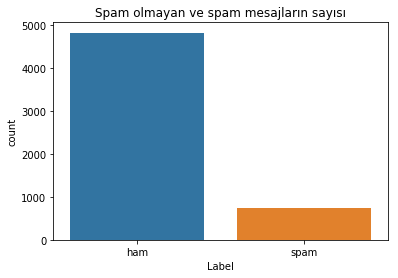

In [4]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Spam olmayan ve spam mesajların sayısı')

# Mesaj sutunu olan v2 yi X'e output olan sutun v1 i Y'ye eşitleyelim. Normalize edelim  ve yeniden boyutlandıralım.

In [5]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

#Verimizi train ve test olarak ayıralım.

In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

#Verileri metin dizilerine dönderelim.
Verdigim max_len keyfi bir deger.Bütün hepsinin aynı boyutta olması gerekir.

In [7]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

### RNN
Modelimizi oluşturalım

In [8]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

Loss ve metrics degerlerimizi ayarlayıp fit edelim.

In [9]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

In [10]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Train on 3788 samples, validate on 948 samples
Epoch 1/10
3788/3788 [==============================] - 13s 4ms/step - loss: 0.3120 - acc: 0.8788 - val_loss: 0.1344 - val_acc: 0.9599
Epoch 2/10
3788/3788 [==============================] - 14s 4ms/step - loss: 0.0780 - acc: 0.9818 - val_loss: 0.0775 - val_acc: 0.9778
Epoch 3/10
3788/3788 [==============================] - 8s 2ms/step - loss: 0.0354 - acc: 0.9910 - val_loss: 0.0773 - val_acc: 0.9736
Epoch 4/10
3788/3788 [==============================] - 7s 2ms/step - loss: 0.0260 - acc: 0.9929 - val_loss: 0.0863 - val_acc: 0.9757


#Modelimizi ayırdıgımız test verimizde degerlendirelim.

In [11]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [12]:
accr = model.evaluate(test_sequences_matrix,Y_test)

836/836 [==============================] - 1s 866us/step


In [13]:
print('Test seti\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.059
  Accuracy: 0.984
